In [1]:
import tifffile as tf
from scipy import ndimage, signal
import numpy as np
import os
import argparse
import glob
import math
from importlib import reload

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

import unionfind as UF

In [2]:
walnut_batch = sorted(glob.glob('../raw/*/'))
bidx = 0
walnut_files = sorted(glob.glob(walnut_batch[bidx] + '*.tif'))
bname = walnut_batch[bidx].split('/')[-2]
print(bname)

2014SBa_R1_T25


In [119]:
widx = 0
print(walnut_files[widx])
img = tf.imread(walnut_files[widx])//256
img = img.astype(np.uint8)

pa, fi = os.path.split(walnut_files[widx])
fname = os.path.splitext(fi)[0]
print(fname)

../raw/2014SBa_R6_T16/001.tif
001


In [120]:
hist0,bins = np.histogram(img, bins=2**(img.dtype.itemsize*8),range=(0,2**(img.dtype.itemsize*8)))
tot = img.size
cumul = np.cumsum(hist0)

In [128]:
print(cumul[-1])
print(tot)

119075880
119075880


In [121]:
fhist = ndimage.median_filter(hist0, size=5, mode='constant', cval=0)

In [126]:
fhist

array([       0,        0,        0,        0,        0,        1,
             12,       26,      124,      416,     1441,     6001,
          30142,   111480,   302667,   728691,  1865828,  4904142,
       10940924, 17844461, 17844461, 17844461,  9658468,  4804925,
        2287011,  1204508,   759660,   555036,   447132,   380099,
         334247,   303813,   281794,   264073,   252329,   242278,
         235857,   231041,   226152,   222595,   220122,   217404,
         215608,   214740,   214700,   214668,   214668,   213304,
         213179,   212121,   211896,   210742,   210052,   209671,
         208784,   208016,   206381,   206290,   206290,   206290,
         206951,   210226,   215804,   224404,   240188,   268501,
         318214,   407067,   555622,   777332,  1040182,  1273643,
        1273643,  1273643,  1091121,   854830,   649628,   507180,
         420042,   370118,   343398,   329485,   320467,   314727,
         301279,   278442,   246942,   208150,   161704,   114

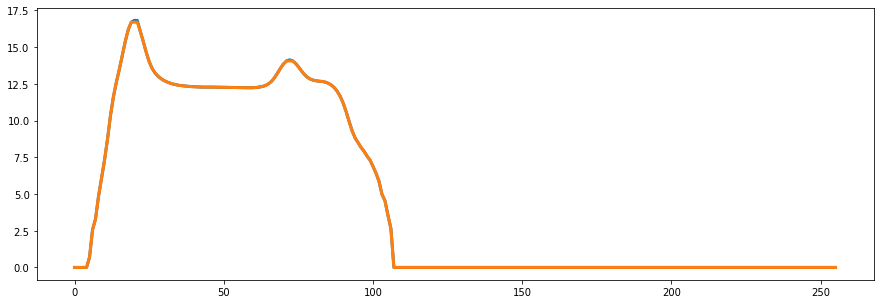

In [122]:
fig = plt.figure(figsize=(15,5))
plt.plot(np.log(hist0 +1), lw=lw);
plt.plot(np.log(fhist+1), lw=lw);

In [125]:
pers = sorted(UF.persistence(hist0),reverse=True)
print(len(pers))
print(pers[:6])

4
[(inf, None, 20), (1167509, 58, 72), (523, 43, 44), (0, 107, 255)]


In [124]:
rpers = sorted(UF.rel_persistence(fhist),reverse=True)
print(len(rpers))
print(rpers[:6])

2
[(inf, None, 21), (0.8380315363096252, 57, 73)]


In [117]:
p0,p1,p2 = pers[:3]
x0,x1,x2 = p0[2],p1[2],p2[2]
anchors = [cumul[x0]/tot,cumul[x1]/tot,cumul[x2]/tot]

print(x0,x1,x2)
print(anchors)

21 72 88
[0.5798811312584883, 0.9326536070949045, 0.9917393094218577]


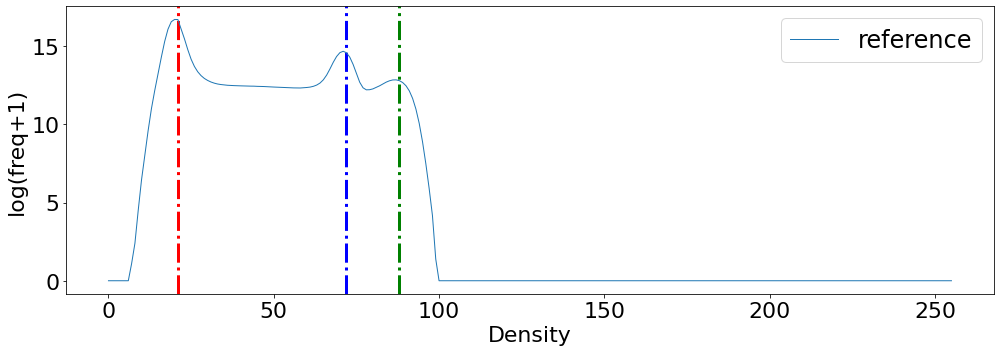

In [118]:
fig, ax = plt.subplots(figsize=(14,5))
lw = 3

ax.axvline(x0, ls='-.', lw=lw, c='r');
ax.axvline(x1, ls='-.', lw=lw, c='b');
ax.axvline(x2, ls='-.', lw=lw, c='g')

ax.plot(bins[:-1],np.log(hist0+1), lw=1, label = 'reference')

ax.set_xlabel("Density", fontsize=22)
ax.set_ylabel("log(freq+1)", fontsize=22)
ax.tick_params(labelsize=22)
ax.legend(fontsize=24)
plt.tight_layout()

In [112]:
np.atleast_1d(ax).flatten()

array([<AxesSubplot:xlabel='Density', ylabel='log(freq+1)'>], dtype=object)

In [101]:
cimg = img.copy()
cimg[cimg < x0] = 0
print(cimg.shape)

(501, 490, 462)


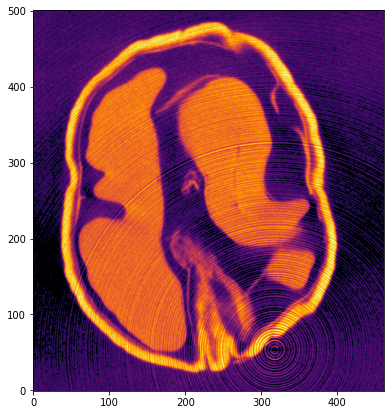

In [102]:
k = 250
ss = np.s_[:, k, :]

fig, ax = plt.subplots(1,3,figsize=(21,7))

ax.imshow(cimg[ss], cmap='inferno', origin='lower', vmax=255, vmin=0)